In [1]:
import numpy as np
import pandas as pd
from sklearn import mixture
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [3]:
def hot_encode(y_true,cl_no):
    
    hotcode = np.zeros((np.shape(y_true)[0],cl_no))
    
    for i in range(np.shape(y_true)[0]):
        hotcode[i,y_true[i]-1] = 1
    
    return hotcode


In [223]:
'''1000 train data'''

train_data = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_100data.csv', header = None)
train_label = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_100label.csv', header = None)



x_in = np.transpose(train_data.to_numpy())
#x_in = norm(x_in)
y_true=np.transpose(train_label.to_numpy())

#y_true_hot = hot_encode(y_true,3)

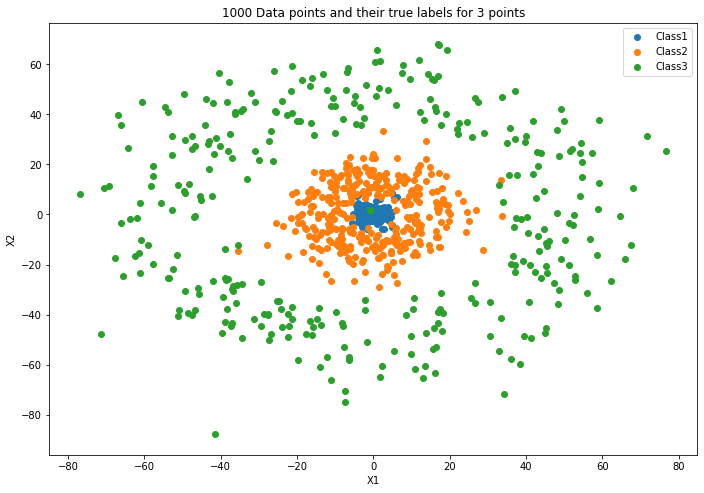

In [224]:
plt.figure()
plt.axes([1,1,1.5,1.5])
ls1 = np.where(y_true == 1)
plt.scatter(x_in[ls1,0], x_in[ls1,1])
ls1 = np.where(y_true == 2)
plt.scatter(x_in[ls1,0], x_in[ls1,1])
ls1 = np.where(y_true == 3)
plt.scatter(x_in[ls1,0], x_in[ls1,1])
plt.xlabel('X1')
plt.ylabel('X2')
N = 3
plt.title('1000 Data points and their true labels for {} points'.format(N))
plt.legend(('Class1', 'Class2', 'Class3', 'Class4'))
plt.show()

In [225]:
for cl in [1,2,3]:
    
    choose = np.where(y_true==cl)
    print(np.shape(choose))
    

(2, 347)
(2, 331)
(2, 322)


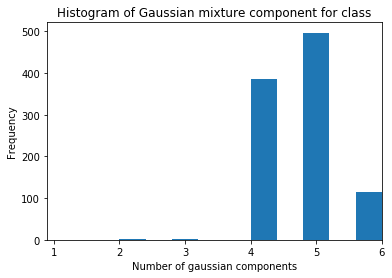

KeyboardInterrupt: 

In [226]:


for cl in [1,2,3]:
    
    choose = np.where(y_true[:,0]==1)
    x = x_in[choose[0],:]
    
    N = np.shape(x)[0]
    #print(N)
    k = 10
    
    
    performance = []
    for i in range(1000):
        
        eva_for_each_boot = []

        for num_of_comp in [1,2,3,4,5,6]: 
            eva_per_comp = []
            for fold in range(k):
                validate = x[fold*(N//k):(fold+1)*(N//k),:]
                train_data = np.concatenate((x[:fold*(N//k),:], x[(fold+1)*(N//k):]), axis = 0)
                #print(np.shape(train_data))
                #print(np.shape(validate))
                gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
                gmm_est.fit(train_data) # Using train data to fit the model
                eva_per_comp.append(gmm_est.score(validate)) # Use evaluation data to validate the model

            eva_for_each_boot.append(np.average(eva_per_comp))
        idx = np.where((eva_for_each_boot==max(eva_for_each_boot)))
        performance.append(np.array(idx[0][0])+1)
    
    
    plt.hist(performance)
    plt.xlim(0.9,6)
    plt.xlabel('Number of gaussian components')
    plt.ylabel('Frequency')
    plt.title('Histogram of Gaussian mixture component for class')
    plt.show()
    
    input('Please press enter')

## GMM class 1

In [50]:
N = 1000
k = 10
num_of_comp = 5

choose = np.where(y_true[:,0]==1)
x = x_in[choose[0],:]

n_features = np.shape(x)[1]


gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
gmm_est.fit(x) # Using train data to fit the model
mean1=gmm_est.means_
cov1 =gmm_est.covariances_
w1 = gmm_est.weights_

## GMM class 2

In [51]:
N = 1000
k = 10
num_of_comp = 5

choose = np.where(y_true[:,0]==2)
x = x_in[choose[0],:]
n_features = np.shape(x)[1]


gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
gmm_est.fit(x) # Using train data to fit the model
mean2=gmm_est.means_
cov2 =gmm_est.covariances_#.reshape(n_features, n_features)
w2 = gmm_est.weights_

## GMM class 3

In [52]:
N = 1000
k = 10
num_of_comp = 5

choose = np.where(y_true[:,0]==1)
x = x_in[choose[0],:]

n_features = np.shape(x)[1]


gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
gmm_est.fit(x) # Using train data to fit the model
mean3=gmm_est.means_
cov3 =gmm_est.covariances_#.reshape(n_features, n_features)
w3 = gmm_est.weights_

In [48]:
print(mean1)

[[ 0.78941869  0.04129317]
 [ 0.01149893  0.02093808]
 [-3.77989196  1.71858278]
 [ 1.45729952 -1.91389582]
 [ 0.22299699  0.06059107]]


In [88]:
def pdf_cal(x,mean,cov,w):
    add = np.zeros((np.shape(x)[0],1))
    for i in range(np.shape(w)[0]):
        
        add += np.reshape((w[i])*multivariate_normal.pdf(x,mean[i],cov[i]),(np.shape(x)[0],1))
        
    return add

In [89]:
test_data = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_data.csv', header = None)
test_label = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_label.csv', header = None)



x_test_in = np.transpose(test_data.to_numpy())
#x_in = norm(x_in)
y_test_true=np.transpose(test_label.to_numpy())


In [96]:
#Calculating Prior
last = []
for cl in [1,2,3]:
    
    choose = np.where(y_true==cl)
    a = np.shape(choose)[-1]
    b = np.shape(y_true)[0]
    print(a,b)
    last.append(a/b)


347 1000
331 1000
322 1000


In [97]:
last

[0.347, 0.331, 0.322]

In [98]:
check = pdf_cal(x_test_in,mean1,cov1,w1)*last[0]

In [99]:
check1 = pdf_cal(x_test_in,mean2,cov2,w2)*last[1]

In [100]:
check2 = pdf_cal(x_test_in,mean3,cov3,w3)*last[2]

In [102]:
final = np.concatenate((check,check1,check2),axis=1)

In [103]:
np.shape(final)

(10000, 3)

In [208]:
decide = np.argmax(final,axis=1)+1

In [209]:
tar = np.reshape(decide,(10000,1)) - np.reshape(y_test_true,(10000,1))

In [210]:
id_test = np.where(tar == 0)

In [211]:
np.shape(id_test)

(2, 6380)

In [229]:
print('Accuracy for model trained with 500 samples :', 0.7003)

Accuracy for model trained with 500 samples : 0.7003



# FOR 500 SIZE

In [173]:
'''500 train data'''

train_data = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_500data.csv', header = None)
train_label = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_500label.csv', header = None)



x_in = np.transpose(train_data.to_numpy())
#x_in = norm(x_in)
y_true=np.transpose(train_label.to_numpy())

#y_true_hot = hot_encode(y_true,3)

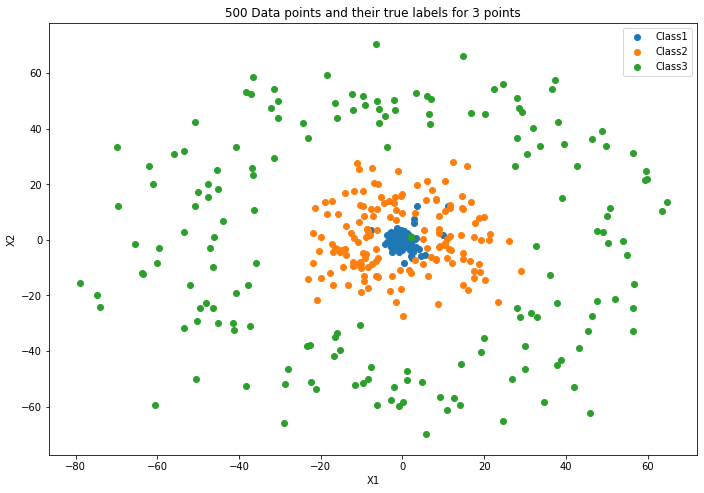

In [174]:
plt.figure()
plt.axes([1,1,1.5,1.5])
ls1 = np.where(y_true == 1)
plt.scatter(x_in[ls1,0], x_in[ls1,1])
ls1 = np.where(y_true == 2)
plt.scatter(x_in[ls1,0], x_in[ls1,1])
ls1 = np.where(y_true == 3)
plt.scatter(x_in[ls1,0], x_in[ls1,1])
plt.xlabel('X1')
plt.ylabel('X2')
N = 3
plt.title('500 Data points and their true labels for {} points'.format(N))
plt.legend(('Class1', 'Class2', 'Class3', 'Class4'))
plt.show()

In [175]:
for cl in [1,2,3]:
    
    choose = np.where(y_true==cl)
    print(np.shape(choose))
    

(2, 180)
(2, 153)
(2, 167)


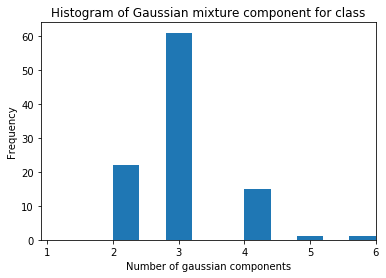

Please press enter


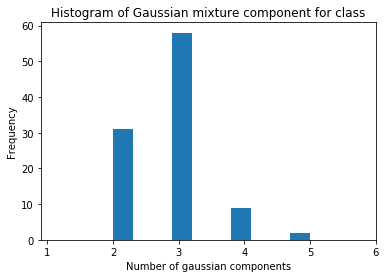

Please press enter


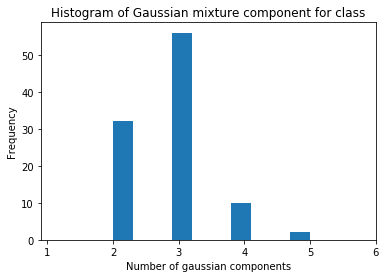

Please press enter


In [110]:


for cl in [1,2,3]:
    
    choose = np.where(y_true[:,0]==1)
    x = x_in[choose[0],:]
    
    N = np.shape(x)[0]
    #print(N)
    k = 10
    
    
    performance = []
    for i in range(100):
        
        eva_for_each_boot = []

        for num_of_comp in [1,2,3,4,5,6]: 
            eva_per_comp = []
            for fold in range(k):
                validate = x[fold*(N//k):(fold+1)*(N//k),:]
                train_data = np.concatenate((x[:fold*(N//k),:], x[(fold+1)*(N//k):]), axis = 0)
                #print(np.shape(train_data))
                #print(np.shape(validate))
                gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
                gmm_est.fit(train_data) # Using train data to fit the model
                eva_per_comp.append(gmm_est.score(validate)) # Use evaluation data to validate the model

            eva_for_each_boot.append(np.average(eva_per_comp))
        idx = np.where((eva_for_each_boot==max(eva_for_each_boot)))
        performance.append(np.array(idx[0][0])+1)
    
    
    plt.hist(performance)
    plt.xlim(0.9,6)
    plt.xlabel('Number of gaussian components')
    plt.ylabel('Frequency')
    plt.title('Histogram of Gaussian mixture component for class')
    plt.show()
    
    input('Please press enter')

## GMM class 1

In [176]:
N = 500
k = 10
num_of_comp = 3

choose = np.where(y_true[:,0]==1)
x = x_in[choose[0],:]

n_features = np.shape(x)[1]


gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
gmm_est.fit(x) # Using train data to fit the model
mean1_500=gmm_est.means_
cov1_500 =gmm_est.covariances_
w1_500 = gmm_est.weights_

## GMM class 2

In [177]:
N = 500
k = 10
num_of_comp = 3

choose = np.where(y_true[:,0]==2)
x = x_in[choose[0],:]
n_features = np.shape(x)[1]


gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
gmm_est.fit(x) # Using train data to fit the model
mean2_500=gmm_est.means_
cov2_500 =gmm_est.covariances_#.reshape(n_features, n_features)
w2_500 = gmm_est.weights_

## GMM class 3

In [178]:
N = 500
k = 10
num_of_comp = 3

choose = np.where(y_true[:,0]==1)
x = x_in[choose[0],:]

n_features = np.shape(x)[1]


gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
gmm_est.fit(x) # Using train data to fit the model
mean3_500=gmm_est.means_
cov3_500 =gmm_est.covariances_#.reshape(n_features, n_features)
w3_500 = gmm_est.weights_

In [179]:
print(mean1)

[[-0.90188609 -3.57857577]
 [-0.45762714  1.01488114]]


In [180]:
def pdf_cal(x,mean,cov,w):
    add = np.zeros((np.shape(x)[0],1))
    for i in range(np.shape(w)[0]):
        
        add += np.reshape((w[i])*multivariate_normal.pdf(x,mean[i],cov[i]),(np.shape(x)[0],1))
        
    return add

In [181]:
test_data = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_data.csv', header = None)
test_label = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_label.csv', header = None)



x_test_in = np.transpose(test_data.to_numpy())
#x_in = norm(x_in)
y_test_true=np.transpose(test_label.to_numpy())


In [182]:
#Calculating Prior
last_500 = []
for cl in [1,2,3]:
    
    choose = np.where(y_true==cl)
    a = np.shape(choose)[-1]
    b = np.shape(y_true)[0]
    print(a,b)
    last_500.append(a/b)


180 500
153 500
167 500


In [183]:
last_500

[0.36, 0.306, 0.334]

In [184]:
check_500 = pdf_cal(x_test_in,mean1_500,cov1_500,w1_500)*last_500[0]

In [185]:
check1_500 = pdf_cal(x_test_in,mean2_500,cov2_500,w2_500)*last_500[1]

In [186]:
check2_500 = pdf_cal(x_test_in,mean3_500,cov3_500,w2_500)*last_500[2]

In [187]:
final_500 = np.concatenate((check_500,check1_500,check2_500),axis=1)

In [188]:
np.shape(final_500)

(10000, 3)

In [212]:
decide_500 = np.argmax(final_500,axis=1)+1

In [213]:
np.shape(decide_500)

(10000,)

In [214]:
id1 = np.where(decide_500 == 2)

In [215]:
np.shape(id1)

(1, 6325)

In [216]:
tar = np.reshape(decide_500,(10000,1)) - np.reshape(y_test_true,(10000,1))

In [217]:
np.shape(tar)

(10000, 1)

In [218]:
id2 = np.where(tar==0)

In [219]:
np.shape(id2)

(2, 5394)

# FOR SIZE 100

In [150]:
'''1000 train data'''

train_data = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/train3_data.csv', header = None)
train_label = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/train3_label.csv', header = None)



x_in = np.transpose(train_data.to_numpy())
#x_in = norm(x_in)
y_true=np.transpose(train_label.to_numpy())

#y_true_hot = hot_encode(y_true,3)

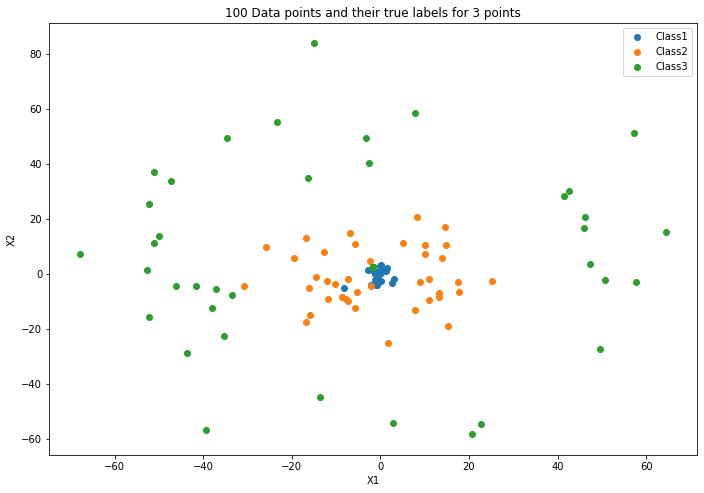

In [151]:
plt.figure()
plt.axes([1,1,1.5,1.5])
ls1 = np.where(y_true == 1)
plt.scatter(x_in[ls1,0], x_in[ls1,1])
ls1 = np.where(y_true == 2)
plt.scatter(x_in[ls1,0], x_in[ls1,1])
ls1 = np.where(y_true == 3)
plt.scatter(x_in[ls1,0], x_in[ls1,1])
plt.xlabel('X1')
plt.ylabel('X2')
N = 3
plt.title('100 Data points and their true labels for {} points'.format(N))
plt.legend(('Class1', 'Class2', 'Class3', 'Class4'))
plt.show()

In [148]:
for cl in [1,2,3]:
    
    choose = np.where(y_true==cl)
    print(np.shape(choose))
    

(2, 23)
(2, 40)
(2, 37)


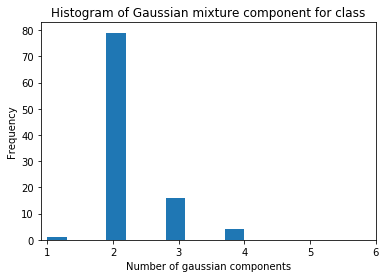

Please press enter


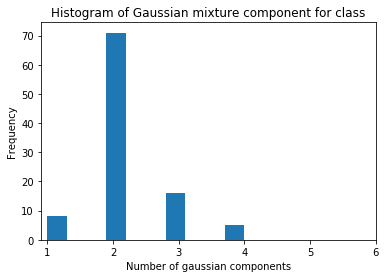

Please press enter


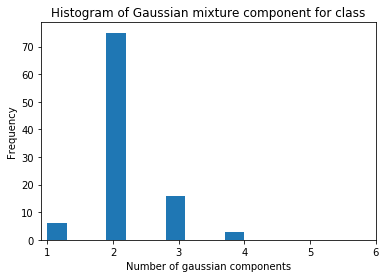

Please press enter


In [129]:


for cl in [1,2,3]:
    
    choose = np.where(y_true[:,0]==1)
    x = x_in[choose[0],:]
    
    N = np.shape(x)[0]
    #print(N)
    k = 10
    
    
    performance = []
    for i in range(100):
        
        eva_for_each_boot = []

        for num_of_comp in [1,2,3,4,5,6]: 
            eva_per_comp = []
            for fold in range(k):
                validate = x[fold*(N//k):(fold+1)*(N//k),:]
                train_data = np.concatenate((x[:fold*(N//k),:], x[(fold+1)*(N//k):]), axis = 0)
                #print(np.shape(train_data))
                #print(np.shape(validate))
                gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
                gmm_est.fit(train_data) # Using train data to fit the model
                eva_per_comp.append(gmm_est.score(validate)) # Use evaluation data to validate the model

            eva_for_each_boot.append(np.average(eva_per_comp))
        idx = np.where((eva_for_each_boot==max(eva_for_each_boot)))
        performance.append(np.array(idx[0][0])+1)
    
    
    plt.hist(performance)
    plt.xlim(0.9,6)
    plt.xlabel('Number of gaussian components')
    plt.ylabel('Frequency')
    plt.title('Histogram of Gaussian mixture component for class')
    plt.show()
    
    input('Please press enter')

## GMM class 1

In [152]:
N = 100
k = 10
num_of_comp = 2

choose = np.where(y_true[:,0]==1)
x = x_in[choose[0],:]

n_features = np.shape(x)[1]


gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
gmm_est.fit(x) # Using train data to fit the model
mean1_100=gmm_est.means_
cov1_100 =gmm_est.covariances_
w1_100 = gmm_est.weights_

## GMM class 2

In [153]:
N = 100
k = 10
num_of_comp = 2

choose = np.where(y_true[:,0]==2)
x = x_in[choose[0],:]
n_features = np.shape(x)[1]


gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
gmm_est.fit(x) # Using train data to fit the model
mean2_100=gmm_est.means_
cov2_100 =gmm_est.covariances_#.reshape(n_features, n_features)
w2_100 = gmm_est.weights_

## GMM class 3

In [154]:
N = 100
k = 10
num_of_comp = 2

choose = np.where(y_true[:,0]==1)
x = x_in[choose[0],:]

n_features = np.shape(x)[1]


gmm_est = mixture.GaussianMixture(n_components = num_of_comp) 
gmm_est.fit(x) # Using train data to fit the model
mean3_100=gmm_est.means_
cov3_100 =gmm_est.covariances_#.reshape(n_features, n_features)
w3_100 = gmm_est.weights_

In [155]:
print(mean1)

[[-0.90188609 -3.57857577]
 [-0.45762714  1.01488114]]


In [156]:
def pdf_cal(x,mean,cov,w):
    add = np.zeros((np.shape(x)[0],1))
    for i in range(np.shape(w)[0]):
        
        add += np.reshape((w[i])*multivariate_normal.pdf(x,mean[i],cov[i]),(np.shape(x)[0],1))
        
    return add

In [157]:
test_data = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_data.csv', header = None)
test_label = pd.read_csv('/home/dwijay/NOTEBOOKS/Untitled Folder/EXAM3/test3_label.csv', header = None)



x_test_in = np.transpose(test_data.to_numpy())
#x_in = norm(x_in)
y_test_true=np.transpose(test_label.to_numpy())


In [158]:
#Calculating Prior
last_100 = []
for cl in [1,2,3]:
    
    choose = np.where(y_true==cl)
    a = np.shape(choose)[-1]
    b = np.shape(y_true)[0]
    print(a,b)
    last_100.append(a/b)


23 100
40 100
37 100


In [159]:
last_100

[0.23, 0.4, 0.37]

In [160]:
check_100 = pdf_cal(x_test_in,mean1_100,cov1_100,w1_100)*last_100[0]

In [161]:
check1_100 = pdf_cal(x_test_in,mean2_100,cov2_100,w2_100)*last_100[1]

In [162]:
check2_100 = pdf_cal(x_test_in,mean3_100,cov3_100,w3_100)*last_100[2]

In [163]:
final_100 = np.concatenate((check_100,check1_100,check2_100),axis=1)

In [164]:
np.shape(final_100)

(10000, 3)

In [220]:
decide_100 = np.argmax(final_100,axis=1)+1

In [221]:
id1 = np.where(decide_100 == 2)

In [222]:
np.shape(id1)

(1, 7003)